# Basics

Run this first to get the data

In [1]:
# Optional: magic for reloading packages at every cell evaluation, great if you're changing code
#%load_ext autoreload
#%autoreload 2

In [2]:
## Imports

# Basic
import numpy as np
import matplotlib.pyplot as plt
import random

# My code, from bary.py
import bary

In [21]:
## Load the lightbulb (X1) and rainbows (X2) data
N = 100
M, X1, X2 = bary.load_quickdraw(N=N)

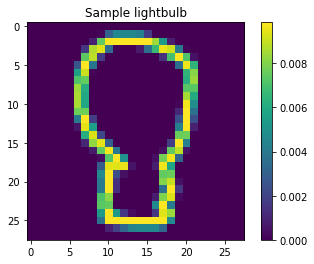

In [25]:
## Plot an image
c = X1[:,np.random.randint(0,N)]
img = np.reshape(c, (28,28))
plt.imshow(img)
plt.colorbar()
plt.title('Sample lightbulb')
plt.show()

# Average-case lightbulb

Runs in 30 seconds

Gradient descent progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.28s/it]


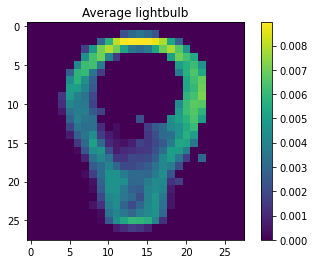

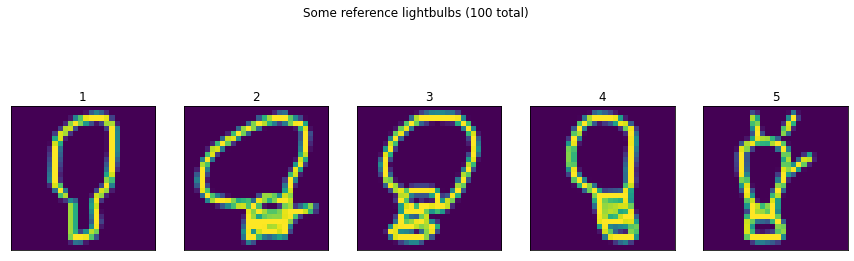

In [28]:
# Run the descent
r1, _, _ = bary.sinkhorn_barycenter(M, X1, noise = 0.01, iterations = 30, steps = 10)

# Plot the averaged image
bary.plot_digits(r1, width=1)
plt.title('Average lightbulb')
plt.show()

# Plot some of the reference images
Xpp = X1[:,np.random.choice(N,5)]
bary.plot_digits(Xpp, width=5)
plt.suptitle('Some reference lightbulbs (%d total)' % N)
plt.show()

# Average-case rainbow

Runs in 30 seconds

Gradient descent progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.10s/it]


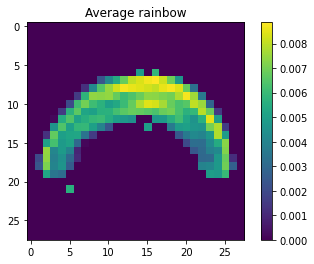

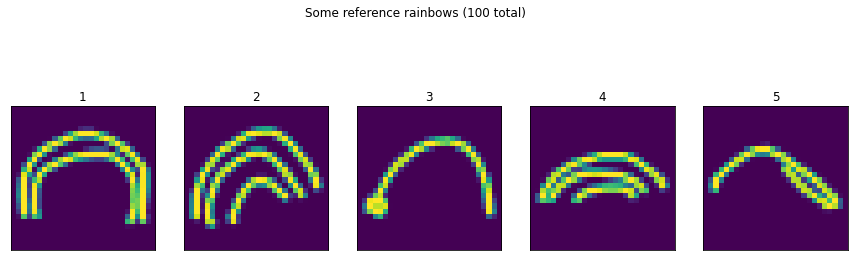

In [29]:
# Run the descent
r2, _, _ = bary.sinkhorn_barycenter(M, X2, noise = 0.01, iterations = 30, steps = 10)

# Plot the averaged image
bary.plot_digits(r2, width=1)
plt.title('Average rainbow')
plt.show()

# Plot some of the reference images
Xpp = X2[:,np.random.choice(N,5)]
bary.plot_digits(Xpp, width=5)
plt.suptitle('Some reference rainbows (%d total)' % N)
plt.show()

# Clustering

Telling apart lightbulbs and rainbows

Runs in 4 minutes

Initializing...
Done initializing


Lloyd's algorithm progress: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:40<00:00, 55.23s/it]


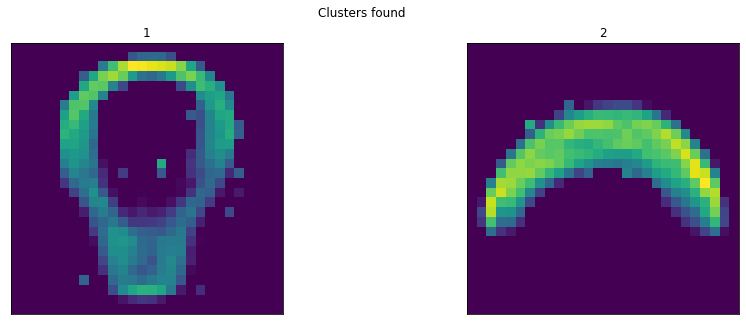

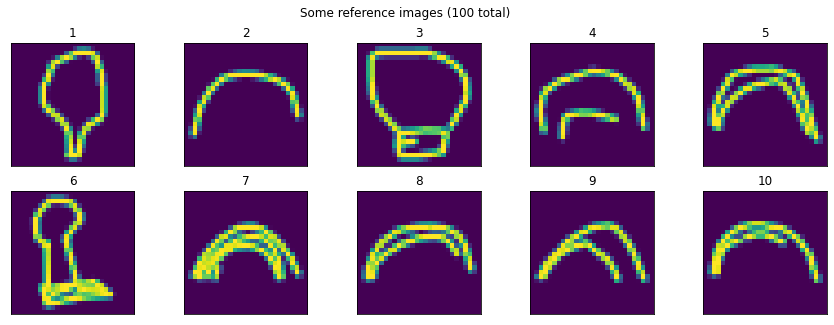

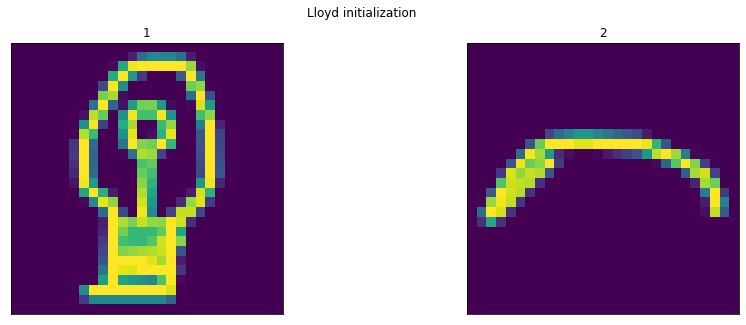

In [34]:
# Concatenate the data
Xp = np.concatenate((X1,X2),axis=1)

# Cluster!
k = 2
_, r, R = bary.k_means_sinkhorn_barycenter(M, Xp, k, noise = 0.01, eta = 0.5, l = 10, iter_sink = 20, iter_Dsink = 20, iter_grad = 6, iter_lloyd = 4)

# Plot the cluster centers
bary.plot_digits(r, width=2)
plt.suptitle('Clusters found')
plt.show()

# Plot some of the reference images
Xpp = Xp[:,np.random.choice(2*N,10)]
bary.plot_digits(Xpp, width=5)
plt.suptitle('Some reference images (%d total)' % m)
plt.show()

# Plot the Lloyd's algorithm initialization
bary.plot_digits(R[:,:,0], width=2)
plt.suptitle('Lloyd initialization')
plt.show()